In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import xlrd
import csv
import matplotlib.pyplot as plt
%matplotlib inline

# Step 1: Natural gas price data - Univariate approach

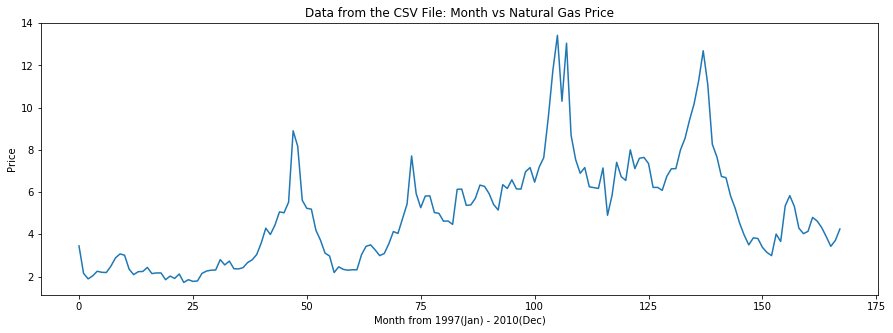

In [2]:
x=[]
y=[]

with open('NGprice.csv', 'r') as csvfile:
    plots= csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(float(row[0]))
        y.append(float(row[1]))


fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.plot(x,y)

plt.title('Data from the CSV File: Month vs Natural Gas Price')

plt.xlabel('Month from 1997(Jan) - 2010(Dec)')
plt.ylabel('Price')

plt.show()

In [3]:
all_data = np.array(y)

print(all_data)

[ 3.45  2.15  1.89  2.03  2.25  2.2   2.19  2.49  2.88  3.07  3.01  2.35
  2.09  2.23  2.24  2.43  2.14  2.17  2.17  1.85  2.02  1.91  2.12  1.72
  1.85  1.77  1.79  2.15  2.26  2.3   2.31  2.8   2.55  2.73  2.37  2.36
  2.42  2.66  2.79  3.04  3.59  4.29  3.99  4.43  5.06  5.02  5.52  8.9
  8.17  5.61  5.23  5.19  4.19  3.72  3.11  2.97  2.19  2.46  2.34  2.3
  2.32  2.32  3.03  3.43  3.5   3.26  2.99  3.09  3.55  4.13  4.04  4.74
  5.43  7.71  5.93  5.26  5.81  5.82  5.03  4.99  4.62  4.63  4.47  6.13
  6.14  5.37  5.39  5.71  6.33  6.27  5.93  5.41  5.15  6.35  6.17  6.58
  6.15  6.14  6.96  7.16  6.47  7.18  7.63  9.53 11.75 13.42 10.3  13.05
  8.69  7.54  6.89  7.16  6.25  6.21  6.17  7.14  4.9   5.85  7.41  6.73
  6.55  8.    7.11  7.6   7.64  7.35  6.22  6.22  6.08  6.74  7.1   7.11
  7.99  8.54  9.41 10.18 11.27 12.69 11.09  8.26  7.67  6.74  6.68  5.82
  5.24  4.52  3.96  3.5   3.83  3.8   3.38  3.14  2.99  4.01  3.66  5.35
  5.83  5.32  4.29  4.03  4.14  4.8   4.63  4.32  3.8

In [4]:
test_data_size = 12

train_data = all_data[:-test_data_size]
test_data = all_data[-test_data_size:]

print(len(train_data))
print(len(test_data))
print(test_data)

156
12
[5.83 5.32 4.29 4.03 4.14 4.8  4.63 4.32 3.89 3.43 3.71 4.25]


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
train_data_normalized = scaler.fit_transform(train_data.reshape(-1, 1))

In [6]:
print(train_data_normalized[:5])
print(train_data_normalized[-5:])

[[0.14786325]
 [0.03675214]
 [0.01452991]
 [0.02649573]
 [0.04529915]]
[[0.12136752]
 [0.10854701]
 [0.1957265 ]
 [0.16581197]
 [0.31025641]]


In [7]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)
train_window = 12
print(train_data_normalized)

tensor([0.1479, 0.0368, 0.0145, 0.0265, 0.0453, 0.0410, 0.0402, 0.0658, 0.0991,
        0.1154, 0.1103, 0.0538, 0.0316, 0.0436, 0.0444, 0.0607, 0.0359, 0.0385,
        0.0385, 0.0111, 0.0256, 0.0162, 0.0342, 0.0000, 0.0111, 0.0043, 0.0060,
        0.0368, 0.0462, 0.0496, 0.0504, 0.0923, 0.0709, 0.0863, 0.0556, 0.0547,
        0.0598, 0.0803, 0.0915, 0.1128, 0.1598, 0.2197, 0.1940, 0.2316, 0.2855,
        0.2821, 0.3248, 0.6137, 0.5513, 0.3325, 0.3000, 0.2966, 0.2111, 0.1709,
        0.1188, 0.1068, 0.0402, 0.0632, 0.0530, 0.0496, 0.0513, 0.0513, 0.1120,
        0.1462, 0.1521, 0.1316, 0.1085, 0.1171, 0.1564, 0.2060, 0.1983, 0.2581,
        0.3171, 0.5120, 0.3598, 0.3026, 0.3496, 0.3504, 0.2829, 0.2795, 0.2479,
        0.2487, 0.2350, 0.3769, 0.3778, 0.3120, 0.3137, 0.3410, 0.3940, 0.3889,
        0.3598, 0.3154, 0.2932, 0.3957, 0.3803, 0.4154, 0.3786, 0.3778, 0.4479,
        0.4650, 0.4060, 0.4667, 0.5051, 0.6675, 0.8573, 1.0000, 0.7333, 0.9684,
        0.5957, 0.4974, 0.4419, 0.4650, 

In [8]:
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [9]:
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)

In [10]:
train_inout_seq[:5]

[(tensor([0.1479, 0.0368, 0.0145, 0.0265, 0.0453, 0.0410, 0.0402, 0.0658, 0.0991,
          0.1154, 0.1103, 0.0538]), tensor([0.0316])),
 (tensor([0.0368, 0.0145, 0.0265, 0.0453, 0.0410, 0.0402, 0.0658, 0.0991, 0.1154,
          0.1103, 0.0538, 0.0316]),
  tensor([0.0436])),
 (tensor([0.0145, 0.0265, 0.0453, 0.0410, 0.0402, 0.0658, 0.0991, 0.1154, 0.1103,
          0.0538, 0.0316, 0.0436]), tensor([0.0444])),
 (tensor([0.0265, 0.0453, 0.0410, 0.0402, 0.0658, 0.0991, 0.1154, 0.1103, 0.0538,
          0.0316, 0.0436, 0.0444]), tensor([0.0607])),
 (tensor([0.0453, 0.0410, 0.0402, 0.0658, 0.0991, 0.1154, 0.1103, 0.0538, 0.0316,
          0.0436, 0.0444, 0.0607]), tensor([0.0359]))]

In [11]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [12]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
print(model)

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


In [13]:
epochs = 200

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.00321670
epoch:  26 loss: 0.00587180
epoch:  51 loss: 0.00812863
epoch:  76 loss: 0.00851273
epoch: 101 loss: 0.00912338
epoch: 126 loss: 0.01075161
epoch: 151 loss: 0.01155406
epoch: 176 loss: 0.01188727
epoch: 199 loss: 0.0121381031


In [14]:
fut_pred = 12

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)


[0.30085471272468567, 0.23931623995304108, 0.1914529949426651, 0.15213675796985626, 0.18034188449382782, 0.17777778208255768, 0.1418803483247757, 0.12136752158403397, 0.10854700952768326, 0.19572649896144867, 0.16581197082996368, 0.3102564215660095]


In [15]:
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())

In [16]:
print(len(test_inputs))
test_inputs[-fut_pred:]

24


[0.2878812253475189,
 0.330515056848526,
 0.3777569830417633,
 0.42015743255615234,
 0.4496508538722992,
 0.45755717158317566,
 0.43840357661247253,
 0.3952058255672455,
 0.33912399411201477,
 0.2872099280357361,
 0.2506594657897949,
 0.2318025678396225]

In [17]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[-train_window:] ).reshape(-1, 1))
print(actual_predictions)


[[5.08821034]
 [5.58702617]
 [6.1397567 ]
 [6.63584196]
 [6.98091499]
 [7.07341891]
 [6.84932185]
 [6.34390816]
 [5.68775073]
 [5.08035616]
 [4.65271575]
 [4.43209004]]


In [18]:
x = np.arange(156, 168, 1)
print(x)

[156 157 158 159 160 161 162 163 164 165 166 167]


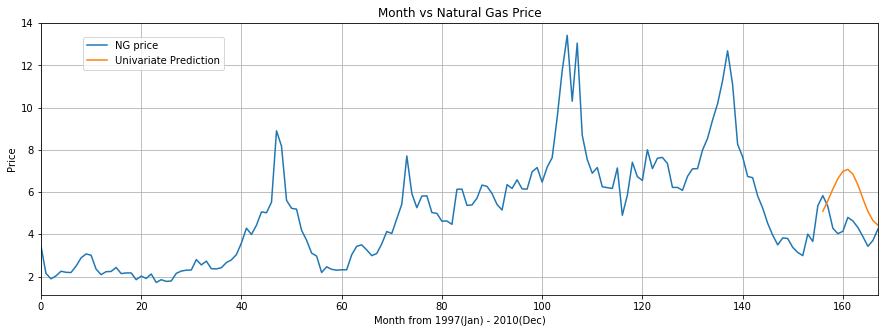

In [19]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.title('Month vs Natural Gas Price')
plt.xlabel('Month from 1997(Jan) - 2010(Dec)')
plt.ylabel('Price')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(y,label='NG price')
plt.plot(x,actual_predictions, label='Univariate Prediction')
plt.legend(bbox_to_anchor=(0.05, 0.95), loc='upper left', borderaxespad=0.)

plt.show()

# Step 2: Natural gas price data and natural gas development well count - Multivariate approach

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
New_data = pd.read_csv('NGprice_wellcount.csv')

In [22]:
New_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
Date         168 non-null object
Price        168 non-null float64
Wellcount    168 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.0+ KB


In [23]:
input_feature= New_data.iloc[:,[1,2]].values
input_data_unnormalized= New_data.iloc[:,[1,2]].values
input_data_normalized = input_feature
#print(input_feature)
x = np.arange(0, 168, 1)
#print(x)
#print(input_data_normalized)

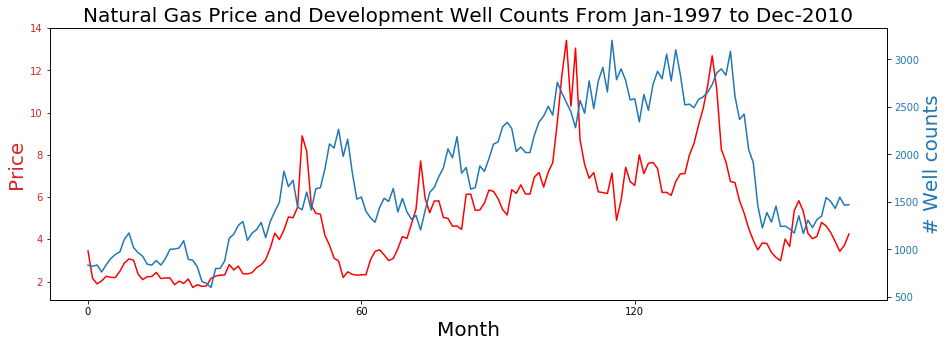

In [24]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

fig, ax1 = plt.subplots()
ax1.plot(x,input_feature[:,0], color='red')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x,input_feature[:,1], color='tab:blue')

# ax1 (left y axis)
ax1.set_xlabel('Month', fontsize=20)
ax1.set_ylabel('Price', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )

# ax2 (right Y axis)
ax2.set_ylabel("# Well counts", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_title("Natural Gas Price and Development Well Counts From Jan-1997 to Dec-2010", fontsize=20)
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
plt.show()

In [25]:
import copy
#print(input_feature)
sc= MinMaxScaler(feature_range=(0,1))
#print(input_feature)
input_feature_copy=copy.deepcopy(input_feature)
input_data_normalized[:,0:2] = sc.fit_transform(input_feature[:,:])
#print(input_data_normalized)
#print(input_feature)

In [26]:
lookback= 12

test_size= 12
X=[]
y=[]
for i in range(len(input_data_normalized)-lookback-1):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data_normalized[[(i+j)], :])
    X.append(t)
    y.append(input_data_normalized[i+ lookback,1])
    

In [27]:
X, y= np.array(X), np.array(y)
print(X.shape)
X_test = X[:test_size+lookback]
#print(X_test.shape)
X = X.reshape(X.shape[0],lookback, 2)
#print(X.shape)
X_test = X_test.reshape(X_test.shape[0],lookback, 2)
print(X.shape)
print(X_test.shape)


(155, 12, 1, 2)
(155, 12, 2)
(24, 12, 2)


In [28]:
from keras import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [29]:
model = Sequential()
model.add(LSTM(units=20, return_sequences= True, input_shape=(X.shape[1],2)))
model.add(LSTM(units=20, return_sequences=True))
model.add(LSTM(units=20))
model.add(Dense(units=1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 12, 20)            1840      
_________________________________________________________________
lstm_2 (LSTM)                (None, 12, 20)            3280      
_________________________________________________________________
lstm_3 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 8,421
Trainable params: 8,421
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
model.fit(X, y, epochs=200, batch_size=30)

Epoch 1/200
155/155 [==============================] - 1s 9ms/step - loss: 0.2105
Epoch 2/200
155/155 [==============================] - 0s 939us/step - loss: 0.0693
Epoch 3/200
155/155 [==============================] - 0s 893us/step - loss: 0.0281
Epoch 4/200
155/155 [==============================] - 0s 839us/step - loss: 0.0338
Epoch 5/200
155/155 [==============================] - 0s 814us/step - loss: 0.0232
Epoch 6/200
155/155 [==============================] - 0s 793us/step - loss: 0.0263
Epoch 7/200
155/155 [==============================] - 0s 787us/step - loss: 0.0219
Epoch 8/200
155/155 [==============================] - 0s 771us/step - loss: 0.0192
Epoch 9/200
155/155 [==============================] - 0s 783us/step - loss: 0.0192
Epoch 10/200
155/155 [==============================] - 0s 754us/step - loss: 0.0181
Epoch 11/200
155/155 [==============================] - 0s 757us/step - loss: 0.0174
Epoch 12/200
155/155 [==============================] - 0s 773us/step - loss

155/155 [==============================] - 0s 827us/step - loss: 0.0045
Epoch 193/200
155/155 [==============================] - 0s 957us/step - loss: 0.0041
Epoch 194/200
155/155 [==============================] - 0s 788us/step - loss: 0.0041
Epoch 195/200
155/155 [==============================] - 0s 785us/step - loss: 0.0040
Epoch 196/200
155/155 [==============================] - 0s 746us/step - loss: 0.0043
Epoch 197/200
155/155 [==============================] - 0s 722us/step - loss: 0.0046
Epoch 198/200
155/155 [==============================] - 0s 759us/step - loss: 0.0044
Epoch 199/200
155/155 [==============================] - 0s 758us/step - loss: 0.0040
Epoch 200/200
155/155 [==============================] - 0s 751us/step - loss: 0.0040


In [32]:
#print(X_test)
predicted_value= model.predict(X_test)
print(predicted_value.shape)
predicted_list = []
for i in range(len(predicted_value)):
    predicted_list.append(predicted_value[i][0])
#print(predicted_list)
#X_test[-test_size:]

(24, 1)


In [33]:
import numpy as np
#print(X_test)
print (predicted_value.shape)
_sc= MinMaxScaler(feature_range=(0,1))
#print(input_feature_copy)
tmp=_sc.fit_transform(input_feature_copy[:,0].reshape(-1, 1))
#print(tmp)
#actual_predictions = scaler.inverse_transform(np.array(test_inputs[-train_window:] ).reshape(-1, 1))
actual_predicted_value = _sc.inverse_transform(np.array(predicted_value[lookback:]).reshape(-1,1))
#print(actual_predicted_value.shape)
print(actual_predicted_value)

(24, 1)
[[3.3616264]
 [3.2411613]
 [3.0833368]
 [2.9269006]
 [2.7953484]
 [2.7686322]
 [2.807965 ]
 [2.8901262]
 [3.0717254]
 [3.3075356]
 [3.5627809]
 [3.8274581]]


In [34]:
x = np.arange(156, 168, 1)
print(x)

[156 157 158 159 160 161 162 163 164 165 166 167]


# Plot and compute MSE

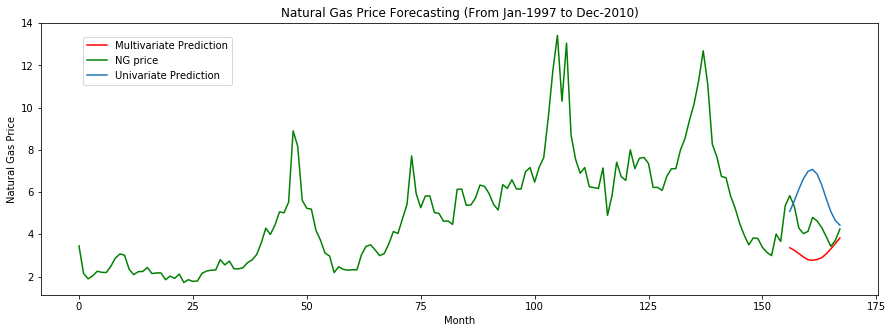

24.984500148924926
41.1809043010995


In [43]:

plt.plot(x,actual_predicted_value[:,0], color= 'red',label='Multivariate Prediction')

#plt.plot(input_data[lookback:test_size+(2*lookback),1], color='green')
plt.plot(input_data_unnormalized[:,0], color='green',label='NG price')

plt.plot(x,actual_predictions, label = 'Univariate Prediction')
plt.legend(bbox_to_anchor=(0.05, 0.95), loc='upper left', borderaxespad=0.)
plt.title("Natural Gas Price Forecasting (From Jan-1997 to Dec-2010)")

plt.xlabel("Month")
plt.ylabel("Natural Gas Price")
plt.show()

#Calculation total MSE
mse1 = (np.square(actual_predicted_value - input_data_unnormalized[-12:,0])).mean(axis=0)
mse2 = (np.square(actual_predictions - input_data_unnormalized[-12:,0])).mean(axis=0)
print(sum(mse1))
print(sum(mse2))
